# Seattle Airbnb:  Data Exploration and Analysis 

This project designs the analysis of [Seattle Airbnb Data Set](https://www.kaggle.com/airbnb/seattle) and follows the CRISP-DM process (Cross Industry Process for Data Mining) 

## 1. Business Understanding
Airbnb is one of the leading online platforms for vacation rentals. 
> Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. [Kaggle](https://www.kaggle.com/airbnb/seattle) 

In order to stay on the ball and so to offer the best service and price it is very critical to gather the insights which factors have the impact on the price.  Therefore, these three questions will be analysed in further investigation: 

1. How does the type of the property influenced the price?
2. How does the neighborhood have impact on price?
3. How well can we predict the price for premisses?

## 2. Data Understanding

Since the major aim of this project is the price, due to that the analysis will primarily concentrate on the listing’s dataset
> Listings, including full descriptions and average review score. [Kaggle](https://www.kaggle.com/airbnb/seattle)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
pd.options.display.max_rows = 4000
pd.options.mode.chained_assignment = None

In [3]:
def read_data(path):
    return pd.read_csv(path)

In [4]:
listings_df = read_data("airbnb_data/listings.csv")


In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings_df.columns, len(listings_df.columns)

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

In [7]:
# delete columns with url
df = listings_df.loc[:, ~listings_df.columns.str.endswith('url')]

In [8]:
df.columns, len(df.columns)

(Index(['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
        'description', 'experiences_offered', 'neighborhood_overview', 'notes',
        'transit', 'host_id', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
        'price', 'weekly_price', 'monthly_price', 'security_deposit',
        'cleaning_fee', 'guests_included', 'extra_p

### 2.1 Find missing values and Cleaning

In [9]:
# Review whether there are any missing values in price 
df['price'].isnull().sum()

0

In [10]:
# conversion of $ price into float
df['price'] = df.price.str.replace('[$,]', '',regex=True).astype('float')

In [11]:
# number of columns with no missing values
cnt_without_nan = len(df.columns[df.isnull().sum()==0])
cnt_without_nan

44

In [12]:
# number of columns with missing values 
cnt_with_nan = len(df) - cnt_without_nan
cnt_with_nan

3774

Most of the columns seems to have missing values. Another step will be to find columns with only missing
values. When it is the case, to remove them from data set. Because they couldn’t be used anyway  

In [13]:
df.columns[df.isnull().all()]

Index(['license'], dtype='object')

In [14]:
df = df.drop(['license'], axis=1)

Detecting the columns with mainly missing values (50%) and (75%).
Of course, in this step one’s would detect the columns with only missing values and so save the step above.  However, so you would oversee the columns which 100% nan. Which potentially will be interesting to approach because this may contain hidden information, why the people don’t what to fill them e.g. sensitive information, lack of time etc.  

In [15]:
df.columns[df.isnull().sum()/len(df) > 0.75]

Index(['square_feet'], dtype='object')

In [16]:
df.columns[df.isnull().sum()/len(df) > 0.50]

Index(['square_feet', 'monthly_price', 'security_deposit'], dtype='object')

Interesting, that the most non filled fields are ‘monthly price’, ‘square feet’ and ‘security deposit’

In [17]:
df_to_test = df.dropna(subset=['square_feet', 'monthly_price', 'security_deposit'], how='any')
df_to_test['monthly_price']

103     $1,795.00
163     $2,552.00
234     $2,500.00
381       $520.00
390     $5,000.00
581     $3,000.00
831     $2,999.00
911     $3,600.00
1187    $1,700.00
1786      $600.00
1836    $2,240.00
1847    $1,600.00
1851    $3,000.00
1870    $1,400.00
1891    $2,800.00
1973    $1,075.00
1997    $1,175.00
2046    $2,200.00
2228    $1,725.00
2303    $1,995.00
2436    $1,900.00
2634    $4,999.00
2652    $1,500.00
2824    $6,850.00
3228    $1,900.00
3480    $1,500.00
3483    $1,400.00
3548    $2,500.00
3810    $5,500.00
Name: monthly_price, dtype: object

In [18]:
# conversion of $ price into float
df_to_test['monthly_price'] = df.monthly_price.str.replace('[$,]', '',regex=True).astype('float')

[Text(0.5, 0, 'monthly price')]

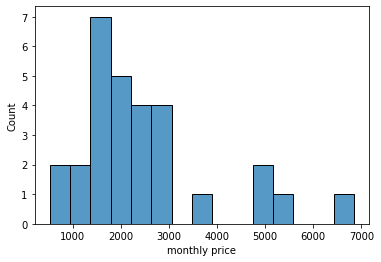

In [19]:
sns.histplot(data=df_to_test, x="monthly_price",bins=15).set(xlabel='monthly price')

<AxesSubplot:xlabel='square_feet', ylabel='Count'>

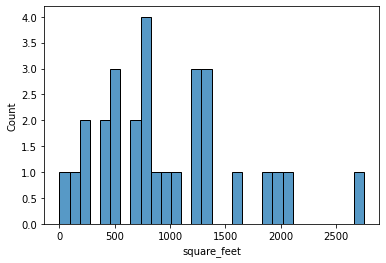

In [20]:
sns.histplot(data=df_to_test, x="square_feet",bins=30)

It is noticeable, that the renter tends to specify the field “square feet” mostly for big premises. In addition, it is to expect, that the monthly payment is the exception. Due to the business model of “Airbnb” rental for the short time. 

### 2.2 Data Exploration

First of all, we look at a representation of the data distribution

<ipython-input-21-9e11832163f0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


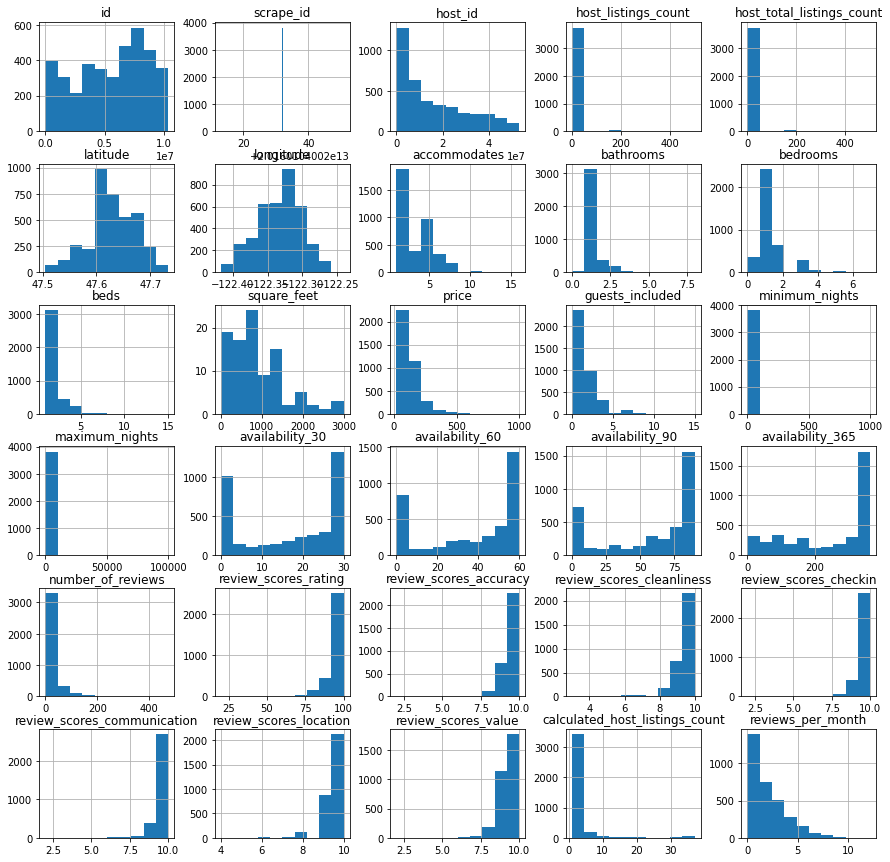

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);


The next step is to look at the relationships between variables 

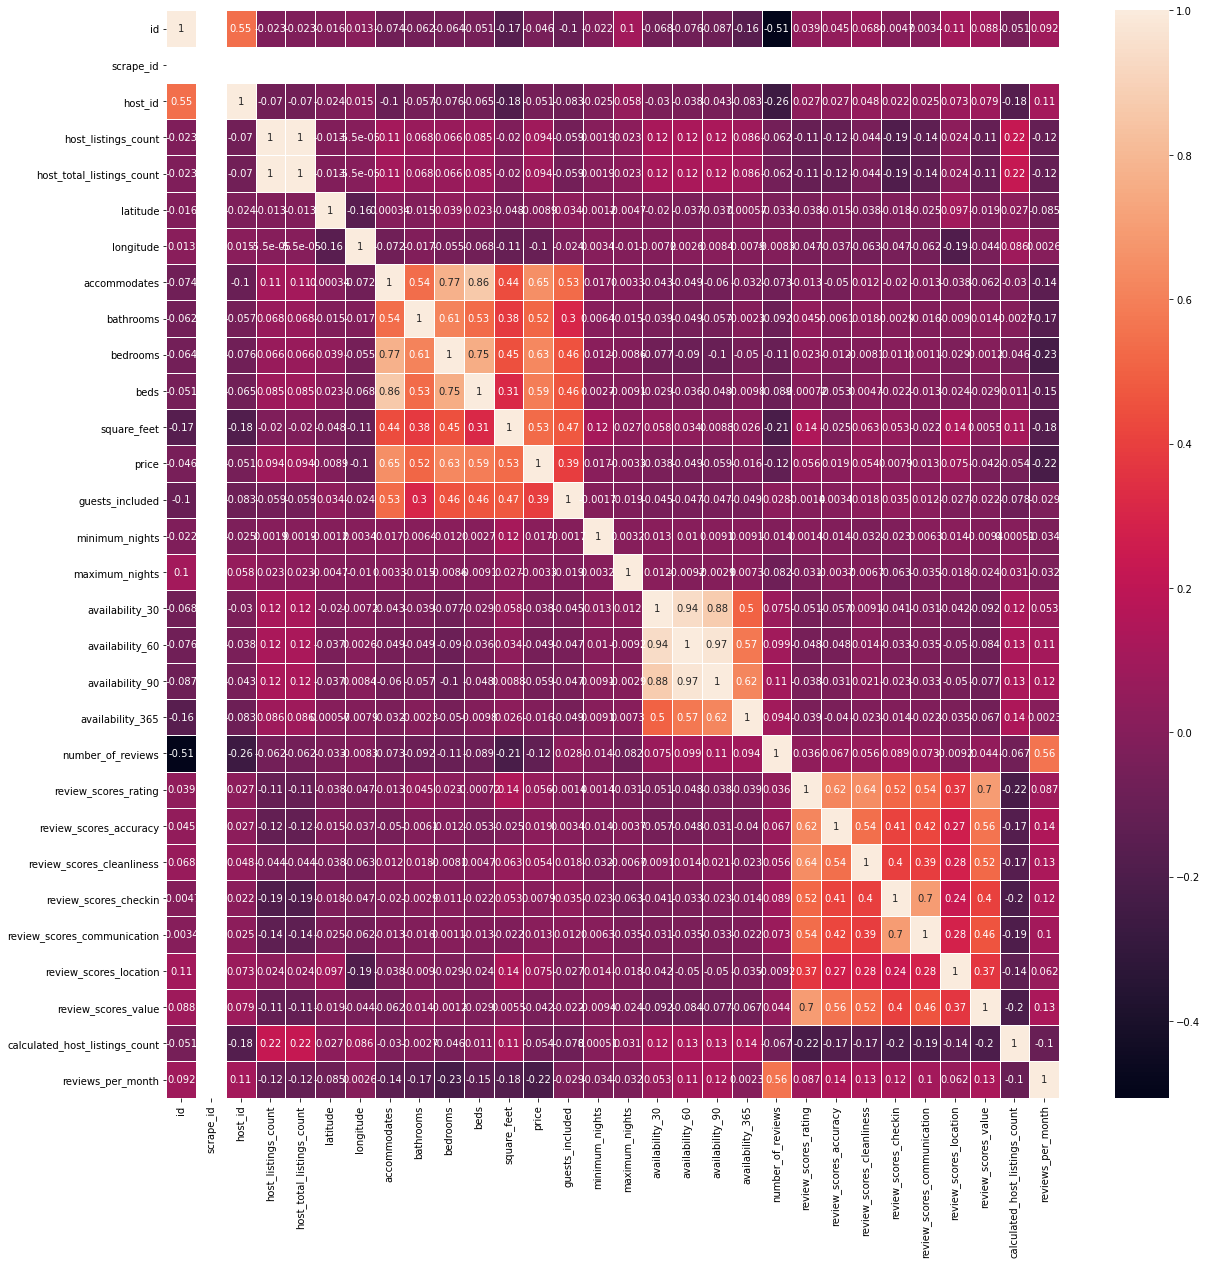

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

The matrix shows that the features such as accommodates, and beds or beds and bedrooms have a very strong positive correlation. Since this analysis concentrate on the price it is important to look at the relationships between price and some other features. On the one hand, price is highly correlated with accommodates, bathrooms, bedrooms, bed and square feet. It is common that you pay more for more demands. 

On the other hand, the number of reviews don’t have positive impact on the price.  In this case, the sentiment analysis of the reviews is required to identify whether the reviews are positive or there are a lot of complains.

### Part 1 "How does the type of the property influenced the price ?"

First of all, we look at the price’s distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

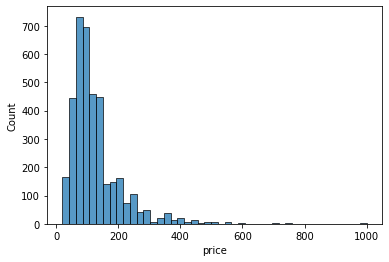

In [23]:
sns.histplot(data=df, x="price",bins=45)

The price is approximately normally distributed with some outliers 

In [24]:
df.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

We can see that the rental price is from 20 dollar up to 1000 dollar, the mean 128 dollar.  Due to the big price range, that should be another factor which influence the rental costs.  For that reason, we should look closely at the price distribution and type of the rental.

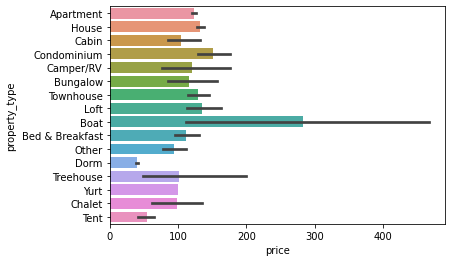

In [25]:
sns.barplot(x="price", y="property_type", data=df);

The pictures shows that the “Boat” and “Treehouse” have the outliers considering the prices. 

The next step will be to look closely on the price range for different rental types as well as to compare the offers and requests. 

In [26]:
df_statistic = df.groupby(['property_type'])['price'].describe().reset_index()
df_statistic

,property_type,count,mean,std,min,25%,50%,75%,max
0,Apartment,1708.0,122.932670,66.617706,20.0,85.00,110.0,149.00,999.0
1,Bed & Breakfast,37.0,112.054054,55.840022,30.0,70.00,99.0,146.00,299.0
2,Boat,8.0,282.375000,281.327434,75.0,92.50,150.0,356.75,775.0
3,Bungalow,13.0,115.615385,75.226922,65.0,75.00,95.0,110.00,349.0
4,Cabin,21.0,104.666667,55.218053,52.0,85.00,95.0,100.00,300.0
5,Camper/RV,13.0,120.461538,95.375237,45.0,75.00,82.0,120.00,375.0
6,Chalet,2.0,98.500000,51.618795,62.0,80.25,98.5,116.75,135.0
7,Condominium,91.0,151.109890,111.091099,50.0,99.00,115.0,155.00,700.0
8,Dorm,2.0,39.500000,2.121320,38.0,38.75,39.5,40.25,41.0
9,House,1733.0,132.351414,106.877963,25.0,65.00,95.0,165.00,1000.0


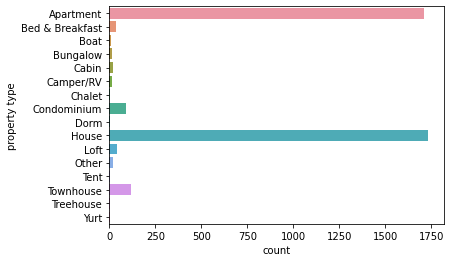

In [27]:
sns.barplot(x="count", y="property_type", data=df_statistic).set(ylabel="property type");

The figure above shows that the most common rental types are apartments and houses 

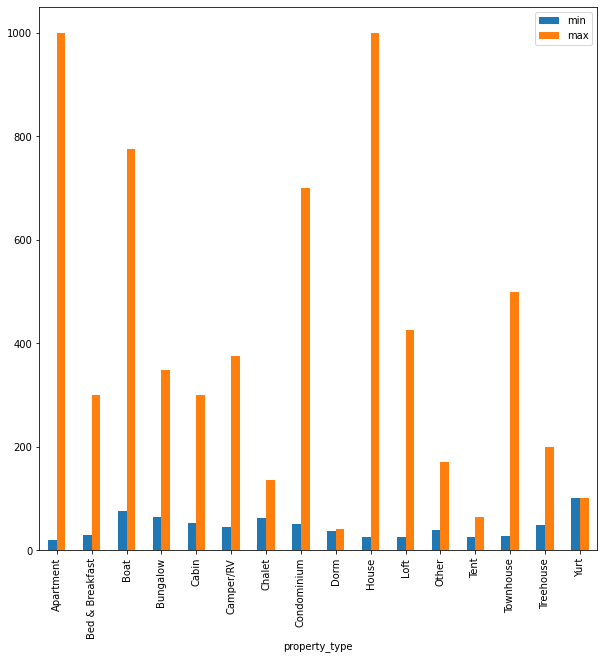

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
df_statistic.plot(x="property_type", y=["min", "max"], kind="bar", ax=ax);

In [29]:
# finding the mode price for the property_type
df.groupby(['property_type'])['price'].agg(pd.Series.mode)

property_type
Apartment                         100.0
Bed & Breakfast                    99.0
Boat                              150.0
Bungalow                           70.0
Cabin               [85.0, 99.0, 100.0]
Camper/RV                          75.0
Chalet                    [62.0, 135.0]
Condominium                       150.0
Dorm                       [38.0, 41.0]
House                              55.0
Loft                              100.0
Other              [40.0, 121.0, 150.0]
Tent                               65.0
Townhouse                         150.0
Treehouse           [48.0, 55.0, 200.0]
Yurt                              100.0
Name: price, dtype: object

To sum up, depending on the type of the property the price can vary. Especially, the most common rental types such as “Apartment” or “House” have a very big price range (20/999 and 25/1000 respectively). However, the mode for “Apartment” and “House” is moderate (100/55).   

### Part 2 "How does the neighborhood have impact on price ?"

First of all, we should look at the prices each neighborhood 

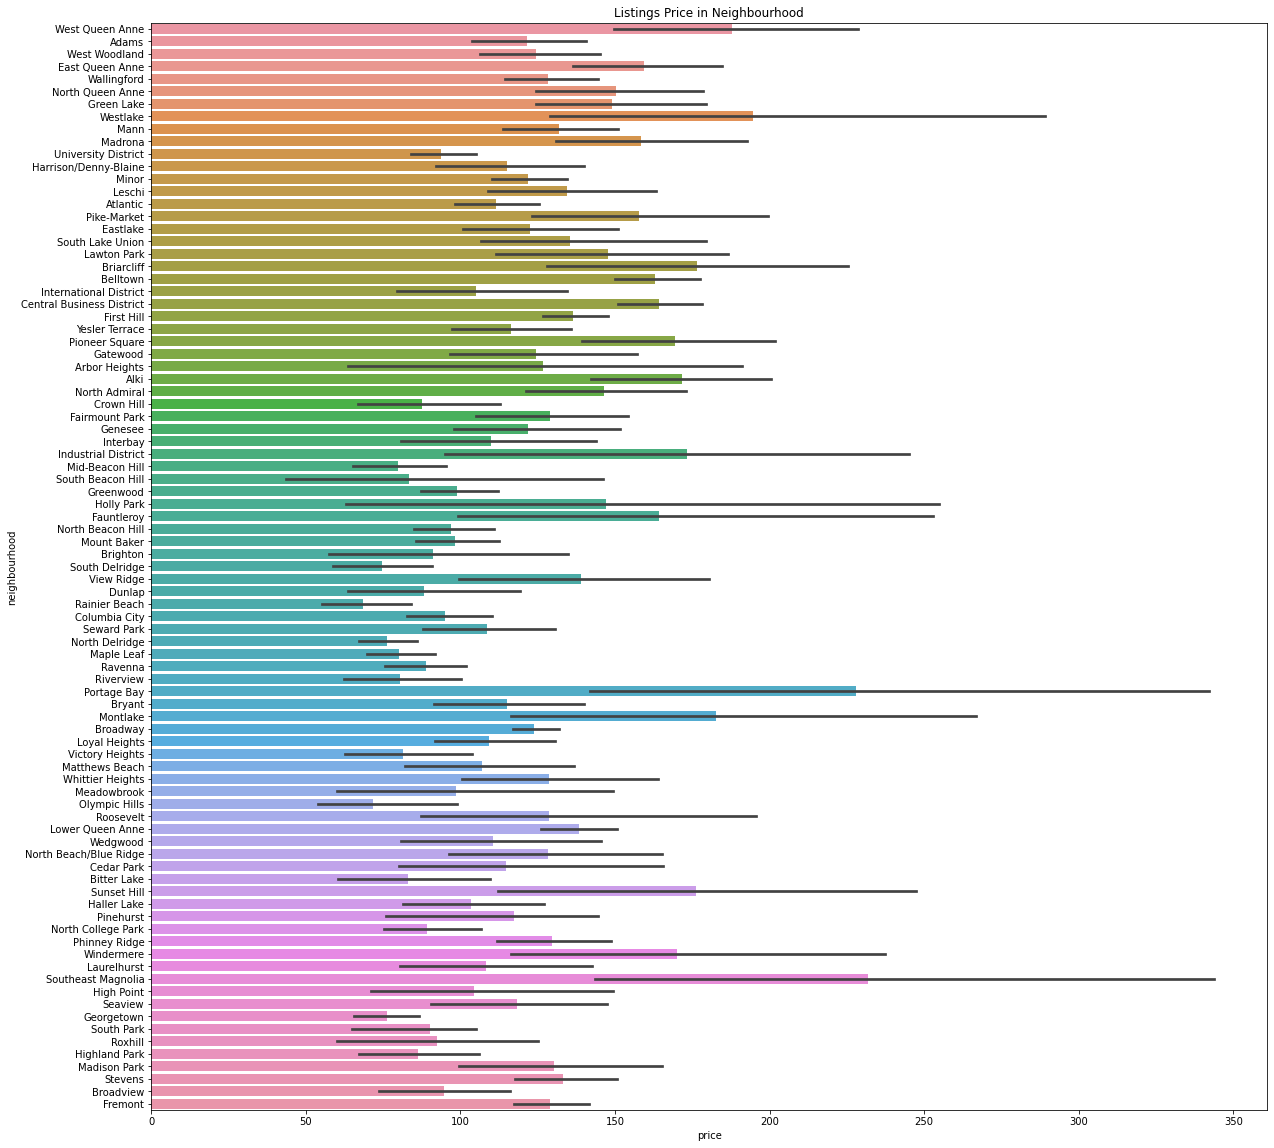

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x="price", y="neighbourhood_cleansed", data=df, ax=ax).set(ylabel='neighbourhood', title="Listings Price in Neighbourhood");

The pictures shows that there are many neighbourhoods with very wide price range e.g. Portage Bay, Southeast Magnolia, Westlake. The statistical tables below would summarize the actual information about prices: 

In [31]:
# neighborhoods with high mean value
df_statistic_neighborhood = df.groupby(['neighbourhood_cleansed'])['price'].describe().reset_index()
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['mean'],ascending=False)
ten_expensive_neighborhood_mean = df_statistic_neighborhood[0:10]
df_statistic_neighborhood 

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
73,Southeast Magnolia,17.0,231.705882,225.117682,48.0,110.00,150.0,250.00,950.0
61,Portage Bay,14.0,227.857143,197.523458,79.0,104.25,132.5,255.25,750.0
83,Westlake,17.0,194.470588,173.057475,65.0,85.00,150.0,200.00,775.0
81,West Queen Anne,65.0,187.769231,170.476425,20.0,90.00,130.0,175.00,975.0
48,Montlake,19.0,182.789474,171.700508,55.0,94.50,125.0,180.00,750.0
6,Briarcliff,14.0,176.571429,96.767536,69.0,99.00,173.5,218.75,375.0
75,Sunset Hill,18.0,176.055556,149.680630,50.0,75.00,85.0,312.50,475.0
32,Industrial District,6.0,173.333333,104.769588,25.0,135.00,150.0,236.25,320.0
1,Alki,42.0,171.619048,97.471685,40.0,99.25,126.5,246.75,399.0
85,Windermere,10.0,169.900000,104.919493,62.0,115.50,127.5,191.25,400.0


In [32]:
# neighborhoods with high max value
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['max'],ascending=False)
df_statistic_neighborhood 

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
65,Roosevelt,30.0,128.533333,169.039219,33.0,80.00,93.5,121.25,1000.0
4,Belltown,234.0,162.893162,110.523031,35.0,112.25,139.0,175.00,999.0
81,West Queen Anne,65.0,187.769231,170.476425,20.0,90.00,130.0,175.00,975.0
73,Southeast Magnolia,17.0,231.705882,225.117682,48.0,110.00,150.0,250.00,950.0
83,Westlake,17.0,194.470588,173.057475,65.0,85.00,150.0,200.00,775.0
61,Portage Bay,14.0,227.857143,197.523458,79.0,104.25,132.5,255.25,750.0
48,Montlake,19.0,182.789474,171.700508,55.0,94.50,125.0,180.00,750.0
16,East Queen Anne,82.0,159.414634,114.311784,39.0,94.25,125.0,187.50,749.0
79,Wallingford,167.0,128.431138,99.054779,39.0,65.00,100.0,152.50,680.0
9,Broadway,397.0,123.889169,77.628634,25.0,79.00,100.0,150.00,673.0


The most expensive arias are Southeast Magnolia, Portage Bay and Westlake looking at the mean for rent a day as well as std is also high. However, the most expensive properties (max) are in Roosevelt, Belltown and West Queen Anne approximately 1000 dollar a day. 


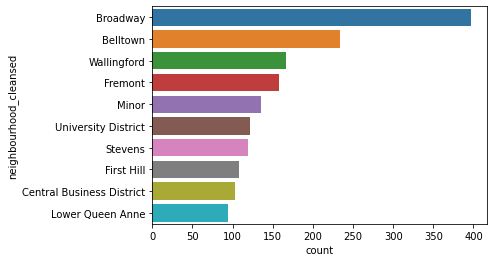

In [33]:
# most popular neighborhoods
df_statistic_neighborhood = df_statistic_neighborhood.sort_values(by=['count'],ascending=False)
sns.barplot(x="count", y="neighbourhood_cleansed", data=df_statistic_neighborhood[0:10]);

In [34]:
# most common neighborhood statistic
df_statistic_neighborhood[0:10]

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
9,Broadway,397.0,123.889169,77.628634,25.0,79.00,100.0,150.0,673.0
4,Belltown,234.0,162.893162,110.523031,35.0,112.25,139.0,175.0,999.0
79,Wallingford,167.0,128.431138,99.054779,39.0,65.00,100.0,152.5,680.0
21,Fremont,158.0,129.056962,80.948615,35.0,75.00,106.0,150.0,500.0
47,Minor,135.0,121.800000,69.760015,37.0,75.00,100.0,150.0,425.0
76,University District,122.0,93.639344,59.721816,28.0,53.50,85.0,105.0,350.0
74,Stevens,119.0,133.210084,97.235767,22.0,80.00,120.0,150.0,545.0
20,First Hill,108.0,136.425926,58.100815,40.0,100.00,127.0,166.0,500.0
12,Central Business District,103.0,164.213592,68.148001,40.0,118.50,149.0,185.5,365.0
38,Lower Queen Anne,94.0,138.202128,67.170875,38.0,96.25,119.0,172.5,498.0


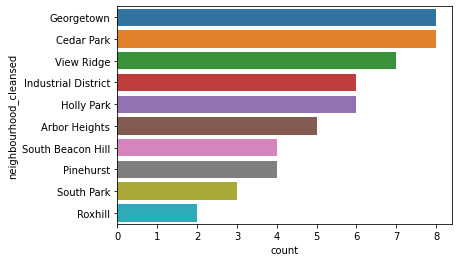

In [35]:
# less popular neighborhoods
sns.barplot(x="count", y="neighbourhood_cleansed", data=df_statistic_neighborhood[-10:]);

In [36]:
# less popular neighborhoods statistic
df_statistic_neighborhood[-10:]

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
24,Georgetown,8.0,76.125000,15.994977,50.0,68.75,72.5,90.00,99.0
11,Cedar Park,8.0,114.625000,64.851341,55.0,77.50,90.5,125.25,250.0
78,View Ridge,7.0,139.000000,60.470378,49.0,115.00,125.0,162.50,244.0
32,Industrial District,6.0,173.333333,104.769588,25.0,135.00,150.0,236.25,320.0
31,Holly Park,6.0,147.166667,129.669452,45.0,52.50,99.0,195.75,375.0
2,Arbor Heights,5.0,126.800000,80.893139,54.0,55.00,100.0,200.00,225.0
69,South Beacon Hill,4.0,83.250000,62.039638,38.0,54.50,60.0,88.75,175.0
59,Pinehurst,4.0,117.250000,42.742446,55.0,107.50,132.0,141.75,150.0
72,South Park,3.0,90.000000,21.794495,65.0,82.50,100.0,102.50,105.0
66,Roxhill,2.0,92.500000,45.961941,60.0,76.25,92.5,108.75,125.0


The result shows, that in the expensive areas with the high prices is the demand still high in comparison to the neighborhood with the lower prices.

Since the apartments and houses are rented the most, it is interesting to look at the price range for this types of rents

In [37]:
df_stat_property_n = df.groupby(['neighbourhood_cleansed', 'property_type'])['price'].describe().reset_index()
df_stat_property_n = df_stat_property_n[df_stat_property_n['property_type'].isin(['House','Apartment'])]
df_stat_property_n.sort_values(by=['max'],ascending=False)

,neighbourhood_cleansed,property_type,count,mean,std,min,25%,50%,75%,max
266,Roosevelt,House,16.0,167.937500,225.937003,39.0,85.00,105.0,149.25,1000.0
21,Belltown,Apartment,208.0,159.451923,102.826422,35.0,114.50,139.0,175.00,999.0
323,West Queen Anne,House,33.0,247.393939,214.222714,45.0,99.00,150.0,350.00,975.0
285,Southeast Magnolia,House,10.0,234.100000,266.031514,68.0,98.75,117.5,244.50,950.0
202,Montlake,House,15.0,191.533333,192.865929,55.0,87.00,115.0,195.00,750.0
253,Portage Bay,House,7.0,340.285714,232.921098,90.0,190.00,257.0,452.50,750.0
69,East Queen Anne,House,20.0,267.250000,179.389572,80.0,127.50,250.0,338.50,749.0
39,Broadway,House,84.0,130.928571,121.530579,40.0,64.75,89.0,138.25,673.0
35,Broadway,Apartment,292.0,120.863014,60.645965,25.0,80.75,107.0,149.25,600.0
74,Eastlake,House,7.0,169.571429,192.407430,59.0,71.50,115.0,135.00,600.0


In [38]:
# sort most expensive_neighbourhoods mean  
most_expensive_neighbourhoods_names = list(ten_expensive_neighborhood_mean.neighbourhood_cleansed)
most_expensive_neighbourhoods_names

['Southeast Magnolia',
 'Portage Bay',
 'Westlake',
 'West Queen Anne',
 'Montlake',
 'Briarcliff',
 'Sunset Hill',
 'Industrial District',
 'Alki',
 'Windermere']

In [39]:
# statistic for houses and apartments for most expensive areas
df_stat_property_house_apartment = df_stat_property_n[df_stat_property_n['neighbourhood_cleansed'].isin(most_expensive_neighbourhoods_names)] 
df_stat_property_house_apartment 

,neighbourhood_cleansed,property_type,count,mean,std,min,25%,50%,75%,max
7,Alki,Apartment,13.0,97.923077,44.699854,40.0,90.00,95.0,100.00,219.0
9,Alki,House,24.0,210.125000,101.505328,79.0,116.50,230.0,276.75,399.0
28,Briarcliff,Apartment,2.0,97.500000,3.535534,95.0,96.25,97.5,98.75,100.0
29,Briarcliff,House,12.0,189.750000,98.686948,69.0,99.00,175.0,231.25,375.0
129,Industrial District,Apartment,2.0,140.000000,14.142136,130.0,135.00,140.0,145.00,150.0
201,Montlake,Apartment,3.0,133.333333,23.629078,115.0,120.00,125.0,142.50,160.0
202,Montlake,House,15.0,191.533333,192.865929,55.0,87.00,115.0,195.00,750.0
252,Portage Bay,Apartment,6.0,113.833333,30.393530,79.0,92.25,109.5,131.25,160.0
253,Portage Bay,House,7.0,340.285714,232.921098,90.0,190.00,257.0,452.50,750.0
284,Southeast Magnolia,Apartment,5.0,219.600000,195.213473,48.0,125.00,150.0,225.00,550.0


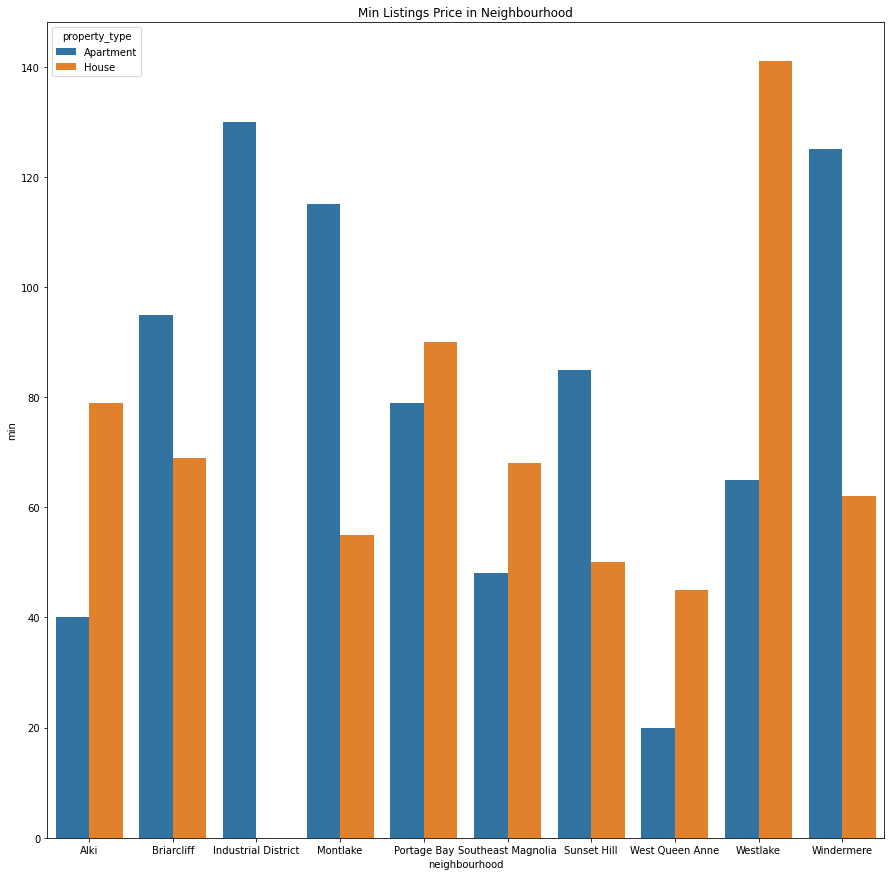

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x="neighbourhood_cleansed", y="min", hue="property_type", \
            data=df_stat_property_house_apartment, ax=ax).set(xlabel='neighbourhood', \
                                                              title="Min Listings Price in Neighbourhood");

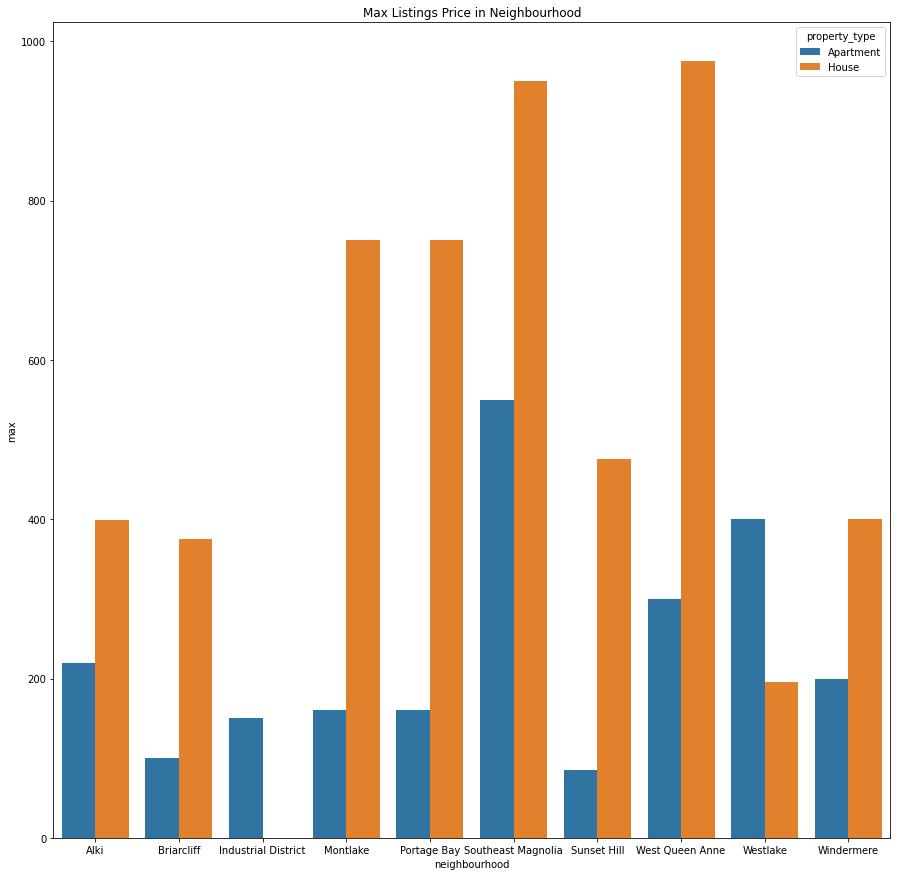

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x="neighbourhood_cleansed", y="max", hue="property_type", data=df_stat_property_house_apartment,\
            ax=ax).set(xlabel='neighbourhood', title="Max Listings Price in Neighbourhood");

The figures show that the maximum as well as minimum price of the houses is almost more expensive than apartments.  Nevertheless, in some areas the start price for apartments is even higher than for a house e.g. Windermere or Briarcliff, however it were only 3 and 2 apartments rented. 

In [42]:
#  sorting by neighbourhood, property_type and square_feet
df_stat_property_n_square_feet = df.groupby(['neighbourhood_cleansed', 'property_type','square_feet'])['price'].describe().reset_index()
df_stat_property_n_square_feet = df_stat_property_n_square_feet[df_stat_property_n_square_feet['property_type'].isin(['House','Apartment'] )]
df_stat_property_n_square_feet.sort_values(by=['max'],ascending=False)

,neighbourhood_cleansed,property_type,square_feet,count,mean,std,min,25%,50%,75%,max
14,Broadway,House,2600.0,1.0,673.000000,NaN,673.0,673.00,673.0,673.00,673.0
72,North Queen Anne,House,3000.0,1.0,395.000000,NaN,395.0,395.00,395.0,395.00,395.0
36,Fairmount Park,House,3000.0,1.0,370.000000,NaN,370.0,370.00,370.0,370.00,370.0
13,Broadway,House,1850.0,1.0,360.000000,NaN,360.0,360.00,360.0,360.00,360.0
17,Broadway,Apartment,1200.0,2.0,237.500000,123.743687,150.0,193.75,237.5,281.25,325.0
56,Mann,House,1800.0,1.0,295.000000,NaN,295.0,295.00,295.0,295.00,295.0
8,Belltown,Apartment,770.0,1.0,275.000000,NaN,275.0,275.00,275.0,275.00,275.0
3,Atlantic,House,1.0,1.0,250.000000,NaN,250.0,250.00,250.0,250.00,250.0
28,East Queen Anne,House,1800.0,1.0,250.000000,NaN,250.0,250.00,250.0,250.00,250.0
83,Wallingford,House,1600.0,2.0,210.000000,49.497475,175.0,192.50,210.0,227.50,245.0


In [43]:
# sorting for most expensive neighbourhood, property_type and square_feet
df_stat_property_n_square_feet = df_stat_property_n_square_feet[df_stat_property_n_square_feet['neighbourhood_cleansed'].isin(most_expensive_neighbourhoods_names)] 
df_stat_property_n_square_feet 

,neighbourhood_cleansed,property_type,square_feet,count,mean,std,min,25%,50%,75%,max
2,Alki,House,1400.0,1.0,240.0,NaN,240.0,240.0,240.0,240.0,240.0
63,Montlake,House,900.0,1.0,129.0,NaN,129.0,129.0,129.0,129.0,129.0


Another point to compare prices will be dependence of the price and square feet of the property, and price, square feet and neighborhood.  Sadly, as described above due to the limitedness of the square feet data, we couldn’t draw that conclusion from the data   

### Part 3 "How well can we predict the price for premisses? What aspects correlate well to the price ? "

## 3. Prepare Data

Due to the “Data Understanding” diverse steps for data prepossessing and cleaning have been already done. However, we should be aware about missing values as well as categorical inputs. 

In case of numerical missing values, I impute the mean of a column be du to low number of outliers. Therefore, mean was chosen over mode.

The categorical input was converted into dummy variables, the nan values was encoded as 0. The test with encoding the nan values as extra column shows, good fit on training data (r squared 0.57
), but worse fit on test dat (r squared  -4.7). For more information about metrics see Chapter 5. Results.        
This results shows that the model isn’t able to generalize on the test data.
      

In [44]:
def data_prepossessing (df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix with all considered features
    y - the corresponding prediction labels  
    
    Perform to obtain the correct X and y objects

    '''
    
    # 1. Select numerical values
    numerical = df[['accommodates','bathrooms', 'bedrooms', 'beds','guests_included','number_of_reviews',\
                   'review_scores_rating','reviews_per_month'] ]
    
    # 2. Impute missing values with mean 
    fill_mean = lambda col: col.fillna(col.mean())
    numerical = numerical.apply(fill_mean, axis=0)
    # 3. Select categorical features 
    categorical = df[['property_type','neighbourhood_cleansed','bed_type'] ]
  
    #4. Create dummy columns for all categorical variables
    categorical = pd.get_dummies(categorical, dummy_na=False, drop_first=True)
    
    #5. Merge numerical and categorical features to one matrix
    X = pd.concat([numerical,categorical], axis=1)
    # 6. Create y as Price column
    y = df['price']
    
    return X, y
    
#Use the function to create X and y
X, y = data_prepossessing(df)

## 4. Model the Data

Since we are trying to predict prices (make a prediction of continuous outcomes), the second type of the supervised learning will be used: regression analysis. 
For this analysis I will build the model with Ordinary least squares Linear Regression between dependent variable price and other independent variables (input variable) in order to find the best fit linear line.  
Feature selection (selection of input variables) is based on the above analysis (2. Data Understanding)

In [45]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [46]:
# Initialization of Linear Regression and training  
lm_model = LinearRegression(normalize=True)  
lm_model.fit(X_train, y_train)  

LinearRegression(normalize=True)

## 5. Results

In order to evaluate the model I will use two types of metrics: MSE and R-squared: 
1. Mean Squared Error (MSE) is the average of the Squared Errors. The higher MSE indicates that the variance or the bias is to large. MSE is especial useful for parameter tuning to compare different models.   
2. R-squared measures how close the data points are to the regression line (the values are scaled between 0 and 1; 1 if the line describes good the relationship between input(x) and output(y) otherwise 0)

In [47]:
def return_metrics_as_table(mse, r_score, set_name):
    '''
    INPUT
    mse - Mean Squared Error (MSE)
    r_score - R-squared 
    set_name - kind of the input data (training/test)
    
    OUTPUT
    formatted table with metrics
    
    Perform pretty table
    '''
    print(set_name)
    table = PrettyTable()
    table.field_names = ["Mean Squared Error", 'R-squared']
    table.add_row([mse, r_score])
    return table

In [48]:
def calculate_metrics(X, Y, model):
    '''
    INPUT
    X - Feature Matrix
    Y - response variable
    Model - Trained model
    
    OUTPUT
    Mean Squared Error (MSE), R-squared, 
    Predicted labels
    
    Perform to calculate metrics
    '''
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    r_score = model.score(X, Y)
    return mse, r_score, pred

In [49]:
def return_metrics_visualisation(X, Y, model, set_name):
    '''
    INPUT
    X - Feature Matrix
    Y - response variable
    Model - Trained model
    set_name - kind of the input data (training/test)
    
    OUTPUT
    Table with calculated metrics and visualisation
    
    bring together metrics and visualisation
    '''
    mse, r_score, pred = calculate_metrics(X, Y, model)
    print(return_metrics_as_table(mse, r_score, set_name))
    sns.regplot(x=Y, y=pred, marker="+").set(title=set_name)

Training
+--------------------+--------------------+
| Mean Squared Error |     R-squared      |
+--------------------+--------------------+
| 3425.9016519114384 | 0.5696649512857576 |
+--------------------+--------------------+


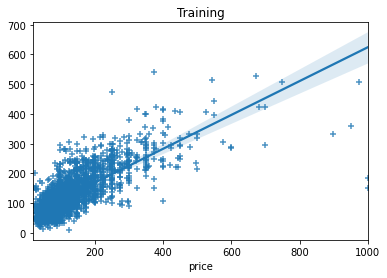

In [50]:
return_metrics_visualisation(X_train, y_train,lm_model, "Training")

Test
+--------------------+-------------------+
| Mean Squared Error |     R-squared     |
+--------------------+-------------------+
| 3636.7676067549814 | 0.575320048960084 |
+--------------------+-------------------+


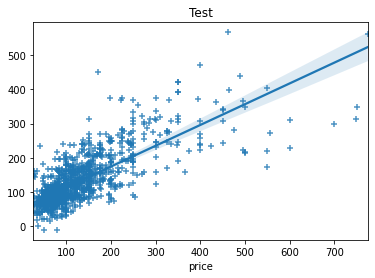

In [51]:
return_metrics_visualisation(X_test, y_test,lm_model, "Test")

As we can see from the residual plots, that the model works well around lower prices but struggle to predict very high prices. In comparison, the value of r squared on the test set is slightly better than on training set. The possible reason for this could be the split into two sets. Where one can have more variance (lower r squared) and the other with less variance (higher r squared). 

A good practise is to look at MSE as well. We can see that the MSE on the training set is 3425, and the MSE of the test set is larger 3636. This seems to be an indicator, that the model is overfitting the training data. 

An alternative approach for the future work sould be taken into consideration [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)


## Conclusion

- The prices are normally distributed with less outlier (e.g. rental types boats and treehouses)
- The highest price range is seen in apartments and houses with (approximately min 20 dollar and max 1000 dollar). However, according to analysis the apartments and houses are more liked than other rental types.
- The demand in the expensive areas with especially high rental price is nonetheless high.
- Even though, the rental price prediction model achieves good results, for lower prices it is still struggles to predict higher prices.  For that reason, other experimentations should be done:  training with different algorithms (e.g. RANSACRegressor ) or imputation with knn to deal with missing values.  
